### 05_DNN_fashion  
Deep Neural Network 深度神經網路  
data = tf.data.Dataset.from_tensor_slices((x,y))  
data = data.map(fuction).shuffle(num_smp).batch(batch_size)  

data_iter = iter(data)  
samples = next(data_iter)  
y_one_hot = tf.one_hot(y, depth=10)  

In [43]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import time

print(sys.version)
print(tf.__version__)
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 
class_names = ["上衣","褲子","套衫","連衣裙","外套","涼鞋","襯衫","運動鞋","袋子","踝靴"]

3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
2.0.0


In [64]:
np.random.seed(13)
n_samples = 50
X = np.random.rand(n_samples).astype(np.float32)
Y = X * 10 + 5
W = tf.Variable(tf.random.normal(shape=(1,),mean=-0.5))
b = tf.Variable(tf.zeros(shape=(1,)))
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.9706699], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [65]:
def linear_regression(x):
    return x * W + b

def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (n_samples)

learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate)
log_grads = []
def run_optimization(show_grads):
    with tf.GradientTape() as tape:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    gradients = tape.gradient(loss, [W, b]) # model.trainable_variables
    if (show_grads):        
        log_grads.append(gradients)
    optimizer.apply_gradients(zip(gradients, [W, b])) # model.trainable_variables

In [66]:
training_steps = 1000
display_step = 100
show_grads = False
for step in range(training_steps):
    show_grads = False
    if (step+1) % display_step == 0:
        show_grads = True
    run_optimization(show_grads)
    if (step+1) % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % ((step+1), loss, W.numpy(), b.numpy()))
                                 

step: 100, loss: 3.721121, W: 4.058379, b: 7.299740
step: 200, loss: 2.237636, W: 5.163899, b: 7.492721
step: 300, loss: 1.651152, W: 5.863091, b: 7.183551
step: 400, loss: 1.220676, W: 6.444644, b: 6.880615
step: 500, loss: 0.902446, W: 6.943144, b: 6.617246
step: 600, loss: 0.667176, W: 7.371651, b: 6.390567
step: 700, loss: 0.493243, W: 7.740079, b: 6.195646
step: 800, loss: 0.364654, W: 8.056865, b: 6.028049
step: 900, loss: 0.269589, W: 8.329244, b: 5.883941
step: 1000, loss: 0.199307, W: 8.563440, b: 5.760034


In [74]:
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([8.56344], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([5.7600336], dtype=float32)>


In [84]:
for item in log_grads:
    print("W_g",item[0].numpy(),"\t","b_g",item[1].numpy())
print("W_g 值是負的，所以W加回去"," b_g 值是正的，所以b減回去")

W_g [-1.746068] 	 b_g [-1.2553313]
W_g [-0.7971609] 	 b_g [0.25156933]
W_g [-0.6304273] 	 b_g [0.32024676]
W_g [-0.5377631] 	 b_g [0.28347275]
W_g [-0.4620472] 	 b_g [0.24437091]
W_g [-0.39725325] 	 b_g [0.21016566]
W_g [-0.34156626] 	 b_g [0.18070987]
W_g [-0.29368493] 	 b_g [0.15538341]
W_g [-0.25251818] 	 b_g [0.13360137]
W_g [-0.21712384] 	 b_g [0.11486955]
W_g 值是負的，所以W加回去  b_g 值是正的，所以b減回去


In [114]:
class_names = ["上衣","褲子","套衫","連衣裙","外套","涼鞋","襯衫","運動鞋","袋子","踝靴"]

def data_normalize(train, test):
    (x_train,y_train) = train
    (x_test,y_test) = test
    x_train = x_train.astype(np.float32) / 255. 
    x_test = x_test.astype(np.float32) /255.
    y_train = keras.utils.to_categorical(y_train)
    y_test = keras.utils.to_categorical(y_test)
    y_train = y_train.astype(np.int32)
    y_test = y_test.astype(np.int32)
    return (x_train,y_train),(x_test,y_test) 

(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()
(x_train,y_train),(x_test,y_test) = data_normalize((x_train,y_train),(x_test,y_test))
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


id_22_外套_lb_4


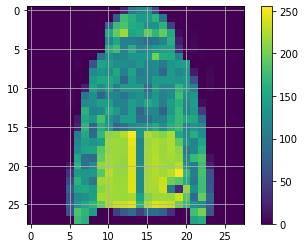

In [112]:
index = np.random.randint(100,size=(1,))
index = index[0]
lb_index = y_train[index]
title = "id_"+str(index)+"_"+class_names[lb_index]+"_lb_"+str(lb_index)
print(title)
plt.figure()
plt.imshow(x_train[index].reshape((28,28)))
plt.colorbar()
plt.grid(True)
plt.show()

In [150]:
batch_size = 128
ds_train = tf.data.Dataset.from_tensor_slices((x_train,y_train))
ds_train = ds_train.shuffle(10000).batch(batch_size)
ds_test =  tf.data.Dataset.from_tensor_slices((x_test,y_test))
ds_test = ds_test.shuffle(10000).batch(batch_size)

ds_iter = iter(ds_train)
samples = next(ds_iter)
print(samples[0].shape,samples[1].shape)

(128, 28, 28) (128, 10)


In [169]:
model = keras.models.Sequential([
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(10,activation="relu")
])
model.build(input_shape=(None, 28*28))
model.summary()
optimizer = keras.optimizers.Adam()
loss_cce = keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_cce)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              multiple                  200960    
_________________________________________________________________
dense_6 (Dense)              multiple                  32896     
_________________________________________________________________
dense_7 (Dense)              multiple                  8256      
_________________________________________________________________
dense_8 (Dense)              multiple                  2080      
_________________________________________________________________
dense_9 (Dense)              multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [175]:
samples = next(ds_iter)
x = samples[0]
print("x.shape",x.shape)
x = tf.reshape(x, [-1,28*28])
print("-1 等其他維度分完再分配")
print("128*28*28 // 28*28 = 128  => (128,784)")
print("x.shape",x.shape)
def train(epochs):
    for epoch in range(epochs):
        for step, (x,y) in enumerate(ds_train):
            x = tf.reshape(x, [-1,28*28])
            with tf.GradientTape() as tape:
                logits = model(x)                
                loss = loss_cce(y, logits)                
                loss = tf.reduce_sum(loss)                
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))            
            if (step+1) % 100 ==0:                
                print("epoch:",(epoch+1),"; step:",(step+1), loss)
    print("Finish training")
    
train(epochs=1)

x.shape (128, 28, 28)
-1 等其他維度分完再分配
128*28*28 // 28*28 = 128  => (128,784)
x.shape (128, 784)
epoch: 1 ; step: 100 tf.Tensor(0.92377347, shape=(), dtype=float32)
epoch: 1 ; step: 200 tf.Tensor(1.0670648, shape=(), dtype=float32)
epoch: 1 ; step: 300 tf.Tensor(1.0812948, shape=(), dtype=float32)
epoch: 1 ; step: 400 tf.Tensor(0.9939983, shape=(), dtype=float32)
Finish training


In [196]:
def test(test_data):
    for step, (x,y) in enumerate(test_data):
        if step < 3:
            x = tf.reshape(x,[-1,28*28]) # (128,784)
            logits = model(x) # (128,10)
            probs = tf.nn.softmax(logits, axis=1) # (128,10)           
            preds = tf.argmax(probs, axis=1) # (128,) vale= 0-9             
            labels = tf.argmax(y, axis=1) # (128,) vale= 0-9             
            correct = tf.equal(preds, labels) # (128,) value=True or False            
            correct = tf.cast(correct,dtype=tf.int32) # (128,) value=1 or 0            
            result = tf.reduce_sum(correct) # (1,)
            accuracy = result / x.shape[0] # batch_size
            print("acc :{:.4f}".format(accuracy.numpy()))            
            
test(ds_test)

acc :0.6641
acc :0.7031
acc :0.6484


predict: 7
label: 7
運動鞋


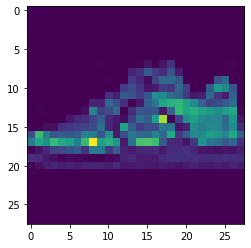

In [221]:
#samples = next(ds_iter)
(x_smp,y_smp) = samples # batch_size = 128
x_smp = x_smp[0:1]
y_smp = y_smp[0:1]

x_smp = tf.reshape(x_smp,[-1,28*28]) # (1,784)
logits = model(x_smp) # (1,10)
logits = tf.reshape(logits, [-1]) # (10,)
predict = tf.argmax(logits, axis=0)
y_smp = tf.reshape(y_smp, [-1]) # (10,)
y_smp = tf.argmax(logits, axis=0)
print("predict:",predict.numpy())
print("label:",y_smp.numpy())
print(class_names[predict.numpy()])
x_smp = tf.reshape(x_smp,[28,28])
plt.figure()
plt.imshow(x_smp)
plt.show()